In [108]:
import os
from copy import deepcopy
import pickle
import numpy as np
import matplotlib.pyplot as plt 

from game import *
from neuralNetwork import *
from agent import *
from main import * 


In [109]:
modelPath = "model/"
os.listdir(modelPath)

['.gitkeep', 'lossDict.pickle', 'modelWeightsDict.pickle']

In [110]:
# load models and loss obtained during training

with open(modelPath + "lossDict.pickle", "rb") as f:
    lossDict = pickle.load(f)
    
with open(modelPath + "modelWeightsDict.pickle", "rb") as f:
    modelWeightsDict = pickle.load(f)

# Evolution of loss during training

Text(0, 0.5, 'Loss')

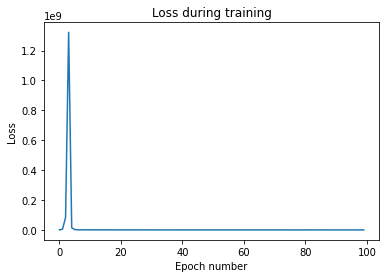

In [111]:
ax = plt.plot(lossDict.values())
plt.title("Loss during training")
plt.xlabel("Epoch number")
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

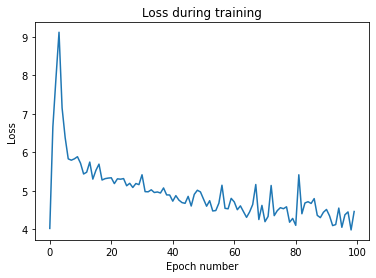

In [112]:
# same with log scale

val = [np.log10(el) for el in lossDict.values()]
ax = plt.plot(val)
plt.title("Loss during training")
plt.xlabel("Epoch number")
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

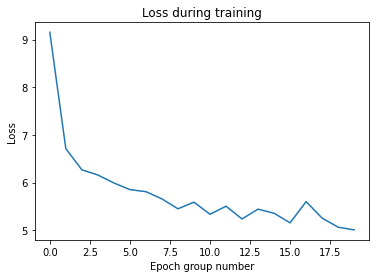

In [114]:
# log-average loss values, averaged over 5 epochs

val = np.array(list(lossDict.values()))
val = np.sum(val.reshape(-1, 5), axis=1) # average over 5 epochs
val = np.apply_along_axis(np.log10, 0, val) # take log
ax = plt.plot(val)
plt.title("Loss during training")
plt.xlabel("Epoch group number")
plt.ylabel("Loss")

# Show policy evolution

In [105]:
env = gameEnvironmentClass() # same start game state

metric0, metric1= {}, {}

for e in range(100):
    
    # agent that explorate a little bit, actions out of its optimal policy
    # or no exploration at all ?
    agent = agentClass(epsilon=0, initial_env=deepcopy(env))

    # load model for epoch e
    policy_model = policyNetworkClass()
    policy_model.load_state_dict(modelWeightsDict[e])

    # select best-valued action, and play game until the end
    maxTry = 1000
    tryCount = 0
    while not gridIsFinished(agent.env.grid):
        if tryCount == maxTry:
            break
        tryCount += 1
        action = agent.choose_action(policy_model)
        agent.interact(action)

    # add value for metric, at the current epoch
    metric0[e] = np.max(agent.env.grid) 
    metric1[e] = np.sum(agent.env.grid)
    metric2[e] = tryCount